# 1. Normal classification

## 1.1 Read data

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import minmax_scale
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')

def getcsv (filepath):
    df=pd.read_csv(filepath)
    return df

df_oc=getcsv('D:\\Bob Xie\\work\\Dataset\\classification_pyod.csv')

namelst=[]
for col in df_oc.columns:
    namelst.append(col)        

namelst.remove('tag')

In [43]:
df_0=df_oc[df_oc['tag']==0]
df_1=df_oc[df_oc['tag']==1]

df_temp_train_0=df_0.sample(n=1200, frac=None, replace=False, weights=None, random_state=None, axis=0)
df_0=df_0.drop(df_temp_train_0.index)
df_temp_test_0=df_0.sample(n=100, frac=None, replace=False, weights=None, random_state=None, axis=0)

df_temp_train_1=df_1.sample(n=120, frac=None, replace=False, weights=None, random_state=None, axis=0)
df_1=df_1.drop(df_temp_train_1.index)
df_temp_test_1=df_1.sample(n=100, frac=None, replace=False, weights=None, random_state=None, axis=0)

df_train=df_temp_train_0.append(df_temp_train_1)
df_test=df_temp_test_0.append(df_temp_test_1)

x_train=df_train[namelst]
y_train=df_train['tag']
x_test=df_test[namelst]
y_test=df_test['tag']

x_train = minmax_scale(x_train)
x_test =  minmax_scale(x_test)

## 1.2 Set up models

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

abc=DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=3,
    min_samples_split=6,
    min_samples_leaf=5,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight={0:1,1:1},
    presort=False,)

ABC=AdaBoostClassifier(base_estimator=abc,
    n_estimators=1000,
    learning_rate=0.1,
    algorithm='SAMME.R',
    random_state=0,
)
ABC.fit(x_train,y_train)

LGBM=LGBMClassifier(boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=1000,
    subsample_for_bin=200000,
    objective=None,
    class_weight={0:1,1:1},
    min_split_gain=0.0,
    min_child_weight=0.001,
    min_child_samples=20,
    subsample=0.8,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=0,
    n_jobs=-1,
    silent=True,
    importance_type='split',
)
LGBM.fit(x_train,y_train)

GBM=GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=1000,
    subsample=0.5,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    init=None,
    random_state=0,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    presort='auto',
)
GBM.fit(x_train,y_train)

LR = LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight={0:1,1:1},
    random_state=0,
    solver='liblinear',
    max_iter=1000,
    multi_class='ovr',
    verbose=0,
    warm_start=False,
    n_jobs=1,
)
LR.fit(x_train,y_train)

svc = SVC(
    probability=True,
    C=1.0,
    kernel='sigmoid',
    degree=3,
    gamma='auto',
    coef0=0.0,
    shrinking=True,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    random_state=None,
)
svc.fit(x_train,y_train)

DT = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight={0:1,1:1},
    presort=False,
)
DT.fit(x_train,y_train)

RF = RandomForestClassifier(
    n_estimators=40,
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=1,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight={0:1,1:1},
)
RF.fit(x_train,y_train)

XGB = XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=1000,
    verbosity=1,
    silent=None,
    objective='binary:logistic',
    booster='gbtree',
    n_jobs=1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,
    missing=None,
)
XGB.fit(x_train,y_train)

XGBClassifier(n_estimators=1000)

## 1.3 Evaluate model's performance

In [45]:
from sklearn.metrics import precision_score, roc_curve, recall_score, f1_score, roc_auc_score, accuracy_score
models = [ABC,RF,XGB,LGBM,LR,svc,DT,GBM]

names = ['ABC','RF','XBG','LGBM','LR','SVC','DT','GBM']
evaluates = ['accuracy','precision','recall','f1','auc']

df_list = []
for name, model in zip(names, models):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    #y_verify_pred=model.predict(x_verify)

    # accuracy
    train_accuracy = model.score(x_train, y_train)
    test_accuracy = model.score(x_test, y_test)
    #verify_accuracy=model.score(x_verify,y_verify)
    
    # precision
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    #verify_precision=precision_score(y_verify,y_verify_pred)
    
    # recall
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    #verify_recall= recall_score(y_verify,y_verify_pred)
    
    # f1
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    #verify_f1=f1_score(y_verify,y_verify_pred)
    
    # auc 
    y_train_pred = model.predict_proba(x_train)[:, 1]
    y_test_pred = model.predict_proba(x_test)[:, 1]
    #y_verify_pred=model.predict_proba(x_verify)[:,1]

    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    #verify_auc=roc_auc_score(y_verify,y_verify_pred)
    

#     df = pd.DataFrame(np.array(
#         [train_accuracy, train_precision, train_recall, train_f1, train_auc, test_accuracy, test_precision, test_recall,
#          test_f1, test_auc, verify_accuracy, verify_precision, verify_recall,verify_f1, verify_auc]).reshape(3, -1),
#                       index=['train', 'test','verify'],
#                       columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-Score'])
    
    df = pd.DataFrame(np.array(
    [train_accuracy, train_precision, train_recall, train_f1, train_auc, test_accuracy, test_precision, test_recall,
     test_f1, test_auc]).reshape(2, -1),
                  index=['train', 'test'],
                  columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-Score'])
    
    df_list.append(df)

pd.concat(df_list, axis=0, keys=names)

Accuracy  Precision    Recall  F1-Score  AUC-Score
ABC  train  1.000000   1.000000  1.000000  1.000000   1.000000
     test   0.530000   1.000000  0.060000  0.113208   0.715600
RF   train  0.909091   0.000000  0.000000  0.000000   0.958319
     test   0.500000   0.000000  0.000000  0.000000   0.742100
XBG  train  1.000000   1.000000  1.000000  1.000000   1.000000
     test   0.600000   1.000000  0.200000  0.333333   0.899500
LGBM train  1.000000   1.000000  1.000000  1.000000   1.000000
     test   0.535000   1.000000  0.070000  0.130841   0.896300
LR   train  0.912121   1.000000  0.033333  0.064516   0.935840
     test   0.515000   1.000000  0.030000  0.058252   0.900000
SVC  train  0.909091   0.000000  0.000000  0.000000   0.994069
     test   0.500000   0.000000  0.000000  0.000000   0.994700
DT   train  0.936364   0.790323  0.408333  0.538462   0.831073
     test   0.535000   0.684211  0.130000  0.218487   0.559250
GBM  train  1.000000   1.000000  1.000000  1.000000   1.000000
     test   0.620000   1.000000  0.240000  0.387097   0.898900

## 1.4 Draw ROC

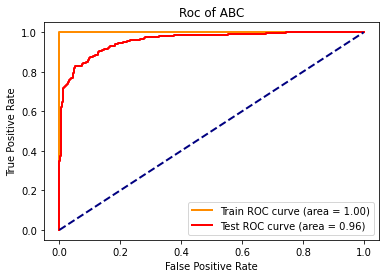

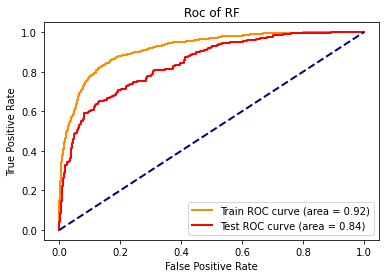

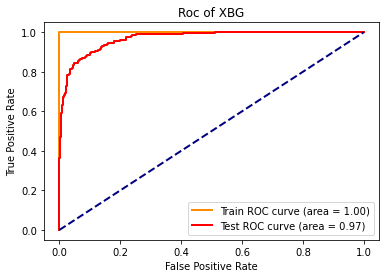

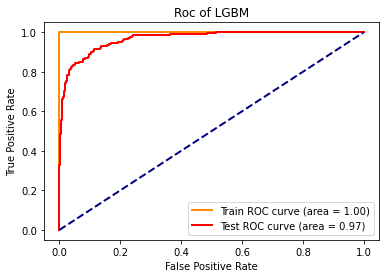

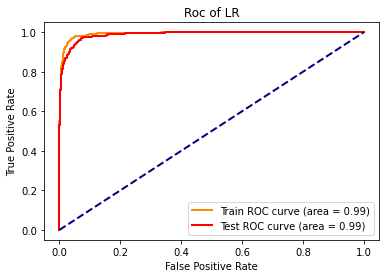

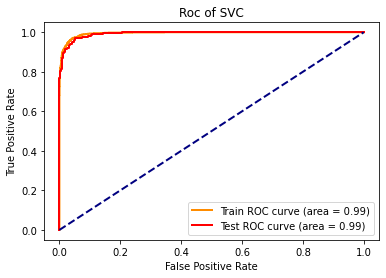

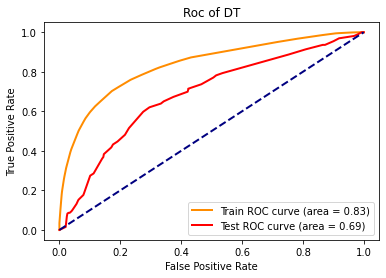

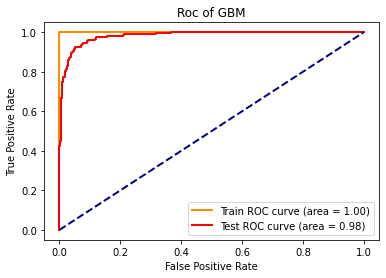

In [6]:
def draw_roc_curve(train_pre_proba, test_pre_proba, train_auc, test_auc, model_name):
    fpr, tpr, roc_auc = train_pre_proba
    test_fpr, test_tpr, test_roc_auc = test_pre_proba

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='Train ROC curve (area = %0.2f)' % train_auc)
    plt.plot(test_fpr, test_tpr, color='red',
             lw=lw, label='Test ROC curve (area = %0.2f)' % test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc of ' + model_name)
    plt.legend(loc="lower right")
    plt.show()

for name, model in zip(names, models):
    y_train_pred = model.predict_proba(x_train)[:, 1]
    y_test_pred = model.predict_proba(x_test)[:, 1]
        
    train_roc = roc_curve(y_train, y_train_pred)
    test_roc = roc_curve(y_test, y_test_pred)
    
    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)

    draw_roc_curve(train_roc, test_roc, train_auc, test_auc, name)

## 1.5 Print confusion matrix

In [7]:
for name, model in zip(names, models):
    print(name)
    print('Train:')
    print(confusion_matrix(y_train,model.predict(x_train)))
    print('Test:')
    print(confusion_matrix(y_test,model.predict(x_test)))
    print('Verified:')

ABC
Train:
[[2125    0]
 [   0 1075]]
Test:
[[509  25]
 [ 52 214]]
Verified:
RF
Train:
[[2125    0]
 [1070    5]]
Test:
[[534   0]
 [266   0]]
Verified:
XBG
Train:
[[2125    0]
 [   0 1075]]
Test:
[[516  18]
 [ 51 215]]
Verified:
LGBM
Train:
[[2125    0]
 [   0 1075]]
Test:
[[517  17]
 [ 55 211]]
Verified:
LR
Train:
[[2099   26]
 [ 123  952]]
Test:
[[524  10]
 [ 37 229]]
Verified:
SVC
Train:
[[2117    8]
 [ 191  884]]
Test:
[[530   4]
 [ 44 222]]
Verified:
DT
Train:
[[1915  210]
 [ 438  637]]
Test:
[[434 100]
 [148 118]]
Verified:
GBM
Train:
[[2125    0]
 [   0 1075]]
Test:
[[519  15]
 [ 46 220]]
Verified:


# 2 PYOD

## 2.1 Prepare train and test sets

In [38]:
df_0=df_oc[df_oc['tag']==0]
df_1=df_oc[df_oc['tag']==1]

df_temp_train_0=df_0.sample(n=1200, frac=None, replace=False, weights=None, random_state=None, axis=0)
df_0=df_0.drop(df_temp_train_0.index)
df_temp_test_0=df_0.sample(n=100, frac=None, replace=False, weights=None, random_state=None, axis=0)

df_temp_train_1=df_1.sample(n=12, frac=None, replace=False, weights=None, random_state=None, axis=0)
df_1=df_1.drop(df_temp_train_1.index)
df_temp_test_1=df_1.sample(n=100, frac=None, replace=False, weights=None, random_state=None, axis=0)

df_train=df_temp_train_0.append(df_temp_train_1)
df_test=df_temp_test_0.append(df_temp_test_1)

x_train=df_train[namelst]
y_train=df_train['tag']
x_test=df_test[namelst]
y_test=df_test['tag']

x_train = minmax_scale(x_train)
x_test =  minmax_scale(x_test)

In [40]:
from sklearn.decomposition import PCA

estimator=PCA(n_components = 15)
x_train=estimator.fit_transform(x_train)


print(estimator.explained_variance_ratio_.sum())

x_test=estimator.transform(x_test)

0.4536291341690027


## 2.2 set up models

In [41]:
import time
start=time.time()

from pyod.models.ocsvm import OCSVM
ocsvm = OCSVM(kernel='rbf', 
              degree=3, 
              gamma='auto', 
              coef0=0.0, 
              tol=0.001, 
              nu=0.0015, 
              shrinking=True, 
              cache_size=200, 
              verbose=False, 
              max_iter=- 1, 
              contamination=0.1)
ocsvm.fit(x_train)

from pyod.models.iforest import IForest
iforest=IForest(
    n_estimators=1000, 
    max_samples='auto', 
    contamination=0.1, 
    max_features=1.0, 
    bootstrap=False, 
    n_jobs=1, 
    behaviour='old', 
    random_state=None, 
    verbose=0 )
iforest.fit(x_train)

from pyod.models.xgbod import XGBOD
xgbod=XGBOD(estimator_list=None, 
            standardization_flag_list=None, 
            max_depth=3, 
            learning_rate=0.1, 
            n_estimators=100, 
            silent=True, 
            objective='binary:logistic', 
            booster='gbtree', 
            n_jobs=1, 
            nthread=None, 
            gamma=0, 
            min_child_weight=1, 
            max_delta_step=0, 
            subsample=1, 
            colsample_bytree=1, 
            colsample_bylevel=1, 
            reg_alpha=0, 
            reg_lambda=1, 
            scale_pos_weight=1, 
            base_score=0.5, 
            random_state=0, 
            missing=None )
xgbod.fit(x_train,y_train)

end=time.time()
print('Runing time=',end-start)

Runing time= 5.660968780517578


## 2.3 Evaluate the model's performance

In [42]:
from sklearn.metrics import precision_score, roc_curve, recall_score, f1_score, roc_auc_score, accuracy_score

models = [ocsvm,iforest,xgbod]
names = ['OCSVM','IForest','XGBOD']
evaluates = ['accuracy','precision','recall','f1','auc']

df_list = []
for name, model in zip(names, models):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    #y_verify_pred=model.predict(x_verify)

    # accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    #verify_accuracy=model.score(x_verify,y_verify)
    
    # precision
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    #verify_precision=precision_score(y_verify,y_verify_pred)
    
    # recall
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    #verify_recall= recall_score(y_verify,y_verify_pred)
    
    # f1
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    #verify_f1=f1_score(y_verify,y_verify_pred)
    
    # auc 
    if model==xgbod:
        y_train_pred = xgbod.predict_proba(x_train)
        y_test_pred = xgbod.predict_proba(x_test)
    else:
        y_train_pred = model.predict_proba(x_train)[:, 1]
        y_test_pred = model.predict_proba(x_test)[:, 1]
    #y_verify_pred=model.predict_proba(x_verify)[:,1]

    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    #verify_auc=roc_auc_score(y_verify,y_verify_pred)
    

#     df = pd.DataFrame(np.array(
#         [train_accuracy, train_precision, train_recall, train_f1, train_auc, test_accuracy, test_precision, test_recall,
#          test_f1, test_auc, verify_accuracy, verify_precision, verify_recall,verify_f1, verify_auc]).reshape(3, -1),
#                       index=['train', 'test','verify'],
#                       columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-Score'])
    
    df = pd.DataFrame(np.array(
    [train_accuracy, train_precision, train_recall, train_f1, train_auc, test_accuracy, test_precision, test_recall,
     test_f1, test_auc]).reshape(2, -1),
                  index=['train', 'test'],
                  columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-Score'])
    
    df_list.append(df)

pd.concat(df_list, axis=0, keys=names)

Accuracy  Precision    Recall  F1-Score  AUC-Score
OCSVM   train  0.892739   0.016393  0.166667  0.029851   0.496528
        test   0.520000   0.750000  0.060000  0.111111   0.538200
IForest train  0.892739   0.016393  0.166667  0.029851   0.465208
        test   0.495000   0.444444  0.040000  0.073394   0.541900
XGBOD   train  0.993399   1.000000  0.333333  0.500000   0.999653
        test   0.500000   0.000000  0.000000  0.000000   0.481900

## 2.4 draw ROC

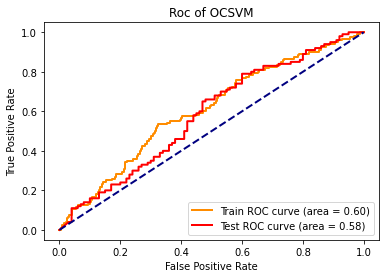

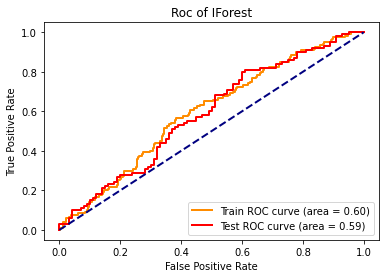

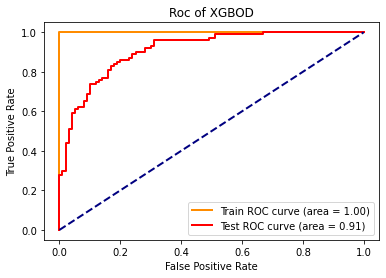

In [22]:
def draw_roc_curve(train_pre_proba, test_pre_proba, train_auc, test_auc, model_name):
    fpr, tpr, roc_auc = train_pre_proba
    test_fpr, test_tpr, test_roc_auc = test_pre_proba
    #verify_fpr, verify_tpr, verify_roc_auc = verify_pre_proba

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='Train ROC curve (area = %0.2f)' % train_auc)
    plt.plot(test_fpr, test_tpr, color='red',
             lw=lw, label='Test ROC curve (area = %0.2f)' % test_auc)
    #plt.plot(verify_fpr, verify_tpr, color='green',
    #         lw=lw, label='Verify ROC curve (area = %0.2f)' % verify_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc of ' + model_name)
    plt.legend(loc="lower right")
    plt.show()

for name, model in zip(names, models):
    if model==xgbod:
        y_train_pred = xgbod.predict_proba(x_train)
        y_test_pred = xgbod.predict_proba(x_test)
        #y_verify_pred=xgbod.predict_proba(x_verify)
    else:
        y_train_pred = model.predict_proba(x_train)[:, 1]
        y_test_pred = model.predict_proba(x_test)[:, 1]
        #y_verify_pred = model.predict_proba(x_verify)[:, 1]
    
    train_roc = roc_curve(y_train, y_train_pred)
    test_roc = roc_curve(y_test, y_test_pred)
    #verify_roc = roc_curve(y_verify, y_verify_pred)
    
    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    #verify_auc = roc_auc_score(y_verify, y_verify_pred)

    draw_roc_curve(train_roc, test_roc, train_auc, test_auc, name)

## 2.5 print confusion matrix

In [23]:
for name, model in zip(names, models):
    print(name)
    print('Train:')
    print(confusion_matrix(y_train,model.predict(x_train)))
    print('Test:')
    print(confusion_matrix(y_test,model.predict(x_test)))

OCSVM
Train:
[[1084  116]
 [ 104   16]]
Test:
[[85 15]
 [81 19]]
IForest
Train:
[[1083  117]
 [ 105   15]]
Test:
[[86 14]
 [79 21]]
XGBOD
Train:
[[1200    0]
 [   5  115]]
Test:
[[100   0]
 [ 99   1]]
